<a href="https://colab.research.google.com/github/Ciiku-Kihara/EAST-AFRICA-FINANCIAL-INCLUSION-PROJECT/blob/main/Faith_Kihara_Financial_Inclusion_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the analysis question

> Determine which factors most affect whether or not individuals have a bank account and hence determine which individuals are most likely to have or use a bank account

### b) Defining the metric for success

> Be able to correctly determine the number of principal components that should be used in building the final model

### c) Understanding the context

> According to World Bank, financial inclusion means that individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way. 
Financial inclusion is a key enabler to reducing poverty and boosting prosperity.
Being able to have access to a transaction account is a first step toward broader financial inclusion since a transaction account allows people to store money, and send and receive payments.

> According to Global Findex Database, 54% of all adults throughout the developing countries have a bank account, an increase of 13 points compared to 2011.

> According to research done by World bank, the main factors that determine financial inclusion include income of individuals or households, education,  being in an employment guarantee scheme, income inequality, age and financial literacy.


> Financial inclusion has continued to deepen over the years in the East African region mainly because of technology and innovation, an enabling government policy and regulatory environment, and infrastructure improvements.
In Sub-Saharan Africa, 44 per cent of the population subscribed to mobile services in 2017.
Mobile banking services for example banking apps and M-shwari have greatly increased bank account ownership in East Africa. This has made making transactions more convenient.

> Inspite of all these developments, there is still alot to be done. For the countries mentioned in this analysis(Rwanda, Kenya, Uganda and Tanzania), the rural population and illiteracy is quite high. Hence the need to determine the factors that can be targeted to ensure that there is greater financial inclusion in East Africa.


### d) Recording the experimental design

> CRISP DM methodology was used in this analysis. 
The steps included in business understanding include:
- Business Understanding
- Data Understanding
- Analysis
- Recommendation
- Evaluation

### e) Data relevance

> The data is relevant to my analysis. However, more information would have been even more relevant.

## 2. Importing relevant libraries

In [256]:
# Importing the pandas library
import pandas as pd

# Importing the numpy library
import numpy as np

# Importing the matplotlib
import matplotlib.pyplot as plt

# Importing seaborn
import seaborn as sns

## 3. Loading the data

In [257]:
# Loading the column descriptions for the main dataset.

url_1 = 'http://bit.ly/VariableDefinitions'
url_2 = 'http://bit.ly/FinancialDataset'

definition = pd.read_csv(url_1)

definition

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [258]:
definition.to_csv('Financial Variable Definitions.csv')

In [259]:
# Loding the main dataset
financial = pd.read_csv(url_2)

financial.head(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


## 4. Checking the data

In [260]:
# Determining the number of rows and columns in our dataset

financial.shape

# The main dataset contains 23,534 rows(observations) and  
# 13 columns(attributes)

(23524, 13)

In [261]:
# Looking at the exact columns

financial.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [262]:
# Getting a glimpse of the first 5 rows of the dataset

financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [263]:
# Getting a glimpse of the last 5 rows of the dataset

financial.tail()

# The data seems to have been read in correctly. There are no glaring errors at this point.

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [264]:
# Checking if each column has an appropriate data type

financial.info()

# All of the columns have the appropriate data type. 2 of the 
# attributes are floats(contain decimals), 1 is an integer and 
# 10 of them are strings(objects)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## 5. External data source validation.

> My data has been validated against numerous datasets obtained from the World Bank Global Findex website. The links to the datasets are as listed below:

> Account ownership: https://globalfindex.worldbank.org/archdownload/chapter/1

> The unbanked: https://globalfindex.worldbank.org/archdownload/chapter/2

> Access to mobile phones and the internet around the world: https://globalfindex.worldbank.org/archdownload/chapter/11

## 6. Tidying the dataset

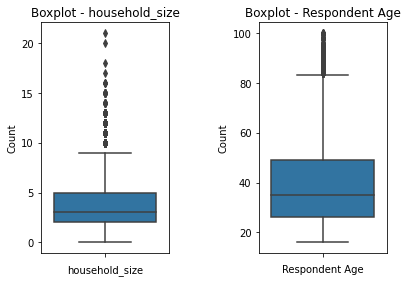

In [265]:
# Checking for outliers (Anomalies in the numerical variables)

cols = ['household_size', 'Respondent Age']

fig, ax = plt.subplots(1,2)

for i, col_val in enumerate(cols):
  sns.boxplot(y = financial[col_val], ax=ax[i])
  ax[i].set_title('Boxplot - {}'.format(col_val))
  ax[i].set_xlabel(col_val)
  ax[i].set_ylabel('Count')

# adjusting space between subplots
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.7,  
                    hspace=0.4)

# From these boxplots, it is clear that household_size and respondent age columns
# contain outliers. The respondent age column has a considerable number of outliers while 
# the household_size column does not have as many (11 outlier values.)


In [266]:
# removing the outliers

# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = financial.quantile(0.25)
Q3 = financial.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'financial_out'
# ---
# 
financial_out = financial[~((financial < (Q1 - 1.5 * IQR)) | (financial > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(financial_out.shape)

# Printing the shape of our old dataset
# ---
#
print(financial.shape)

# Number of rows removed

rows_removed = financial.shape[0] - financial_out.shape[0]
rows_removed

# Percentage of rows removed of the percentage
row_percent = (rows_removed/financial.shape[0]) * 100
row_percent

# Removing the outliers in our dataframe reduced the number of rows by 621
# which is 2.6% of the initial dataset size. Outliers badly affect mean and 
# standard deviation of the dataset. They may statistically give erroneous results hence
# the decision to remove them.


(22903, 13)
(23524, 13)


2.639857167148444

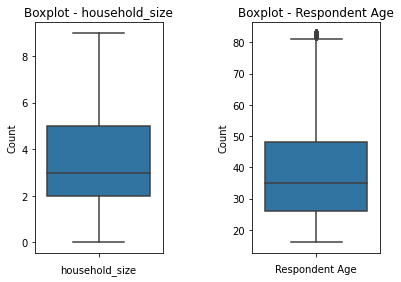

In [267]:
# Boxplots after outlier removal

cols = ['household_size', 'Respondent Age']

fig, ax = plt.subplots(1,2)

for i, col_val in enumerate(cols):
  sns.boxplot(y = financial_out[col_val], ax=ax[i])
  ax[i].set_title('Boxplot - {}'.format(col_val))
  ax[i].set_xlabel(col_val)
  ax[i].set_ylabel('Count')

# adjusting space between subplots
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.7,  
                    hspace=0.4)

# After removal of outliers the respondent age column still had outliers,
# but not as many as before as shown as in the Respondent Age boxplot below. 

In [268]:
# Checking for anomalies in the categorical data

cols = ['country', 'year','Has a Bank account', 'Type of Location', 'Cell Phone Access','gender_of_respondent', 
        'The relathip with head', 'marital_status','Level of Educuation', 'Type of Job']

for i in cols:
  print(i,':', financial_out[i].unique())

# The level of Education column has an entry that has not been specified in the data
# description. This is the entry '6'.
# The other columns all contain the correct entries as per the data description

country : ['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']
year : [2018 2016 2017]
Has a Bank account : ['Yes' 'No' nan]
Type of Location : ['Rural' 'Urban' nan]
Cell Phone Access : ['Yes' 'No' nan]
gender_of_respondent : ['Female' 'Male' nan]
The relathip with head : ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' nan]
marital_status : ['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know' nan]
Level of Educuation : ['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6' nan]
Type of Job : ['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' nan 'No Income']


In [269]:
# Cleaning up the Level of Education column

financial_out['Level of Educuation'] = financial_out['Level of Educuation'].str.replace('6','Other/Dont know/RTA' )

financial_out['Level of Educuation'].unique()

# The unknown '6' category entry under Level of Education column has been 
# put under the category 'Other/Dont know/RTA' since we do not know what '6' 
# category represents.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', nan], dtype=object)

In [270]:
# Check for missing values

financial_out.isna().sum()

# As shown below, all columns have missing values except year
# and uniqueid. 'Has a bank account' column has the highest number of
# missing values(36).'The relathip with head' has the lowest number of missing
# values(4). 

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [271]:
# Dealing with missing values

financial_out = financial_out[financial_out['Has a Bank account'].notna()]

financial_out = financial_out[financial_out['country'].notna()]
financial_out.isna().sum()

# Selecting only records in the dataset where the 'Has a Bank account' and 'country' 
# column is not null. It is not possible to guess whether a person has a bank account
# or not or which country they live in and therefore might as well remove those records 
# and deal with the other null values
# afterwards.


country                    0
year                       0
uniqueid                   0
Has a Bank account         0
Type of Location           7
Cell Phone Access          3
household_size            27
Respondent Age            30
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [272]:
# Dealing with missing values

financial_out['Respondent Age'].fillna(financial_out['Respondent Age'].mean(), inplace=True)
financial_out['household_size'].fillna(financial_out['household_size'].mean(), inplace=True)

financial_out.isna().sum()

# Replaced the null values in the Respondent Age and household_size columns with their mean.

country                    0
year                       0
uniqueid                   0
Has a Bank account         0
Type of Location           7
Cell Phone Access          3
household_size             0
Respondent Age             0
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [273]:
# Dropping all other rows with null values

financial_out.dropna(inplace=True)

financial_out.info()

# After dealing with the missing values, the number of observations reduced
# from 22,903 to 22,764 which is a loss of 139 records

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22764 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22764 non-null  object 
 1   year                    22764 non-null  int64  
 2   uniqueid                22764 non-null  object 
 3   Has a Bank account      22764 non-null  object 
 4   Type of Location        22764 non-null  object 
 5   Cell Phone Access       22764 non-null  object 
 6   household_size          22764 non-null  float64
 7   Respondent Age          22764 non-null  float64
 8   gender_of_respondent    22764 non-null  object 
 9   The relathip with head  22764 non-null  object 
 10  marital_status          22764 non-null  object 
 11  Level of Educuation     22764 non-null  object 
 12  Type of Job             22764 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.4+ MB


In [274]:
# Making the columns uniform

financial_out.columns = financial_out.columns.str.lower().str.replace(' ', '_').str.strip()
financial_out.head()

# All columns have been changed to lowercase and the spaces replaced with an underscore'_'.
# The columns have also been rid of any whitespaces.

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [275]:
# Checking for any duplicated records

financial_out.duplicated().any()

# The dataframe does not have any duplicated records

False

In [276]:
# Dropping all irrelevant columns

financial_out.drop('uniqueid', axis=1, inplace= True)
financial_out.columns

# The uniqueid column was dropped because it is irrelevant
# to our analysis.

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

## 7. Exploratory analysis

### a) Univariate analysis

> 'Country' column - This column contains categorical data

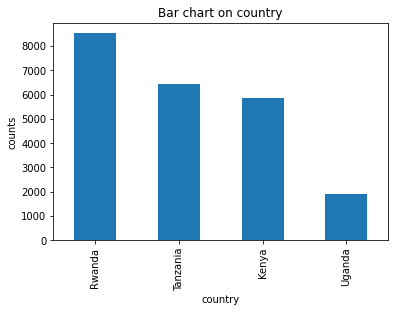

In [277]:
# Bar chart on country

financial_out['country'].value_counts().plot.bar()
plt.title('Bar chart on country')
plt.ylabel('counts')
plt.xlabel('country')
plt.show()

# Most of the entries in the dataset are from Rwanda(approx. 8000 entries), 
# followed by Tanzania(approx. 6500 entries), then Kenya(approx. 6000 entries) and 
# finally Uganda(approx. 2000 entries)

> 'has_a_bank_account' column - Contains categorical data

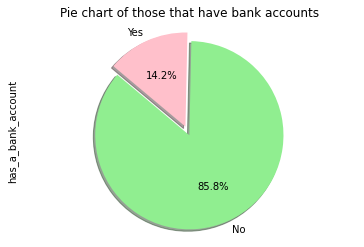

In [278]:
# Pie chart for the 'has_a_bank_account' column

bank_account = financial_out.has_a_bank_account.value_counts()

# Highlighting yes
explode = (0.1, 0)  
colors = ['lightgreen', 'pink']

# Plotting our pie chart
bank_account.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie chart of those that have bank accounts')
plt.show()

# Only 14.2% of individuals recorded that they have a bank account.
# A worrying 85.8% of individuals did not have a bank account.


> 'type_of_location' column - Contains categorical data

In [279]:
# Frequency table for the type of location column

financial_out.type_of_location.value_counts()

# 13831 respondents come from rural areas and 8933 come from urban areas.

Rural    13831
Urban     8933
Name: type_of_location, dtype: int64

> 'cell_phone_access' column - contains categorical data

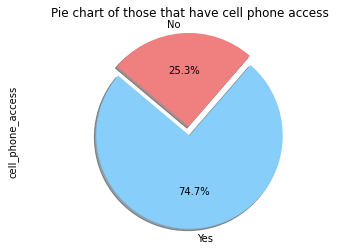

In [280]:
# Pie chart for the 'cell_phone_access' column

phone_access = financial_out.cell_phone_access.value_counts()

# Highlighting yes
explode = (0.1, 0)  
colors = ['lightskyblue', 'lightcoral']

# Plotting our pie chart
phone_access.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie chart of those that have cell phone access')
plt.show()

# 25.3% of respondents had no access to a cellphone while
# 74.7% had access to a cell phone.

> 'household_size' column - contains numerical data

In [281]:
# General description of the household size column

financial_out['household_size'].describe()

# The minimum household size is 0 and maximum household size is 9
# The average household size is 3(rounded off downwards) which is given by the mean value.
# 25% of the respondents have a household size 2 and below, 50% of respondents have a
# household size 3 and below and 75% of respondents have a household size of 5 and below.


count    22764.000000
mean         3.579762
std          2.079757
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: household_size, dtype: float64

In [282]:
# Obtaining the coefficient of variation

c_v = financial_out['household_size'].std()/financial_out['household_size'].mean()
c_v

# The coefficient of variation is less than 1 which means that the variation in
# household size among the respondents is low

0.5809763250959851

In [283]:
# Obtaining the skewness

financial_out['household_size'].skew()

# The skewness is only slightly positively skewed which indicates 
# that the distribution of the households is nearly normal.

0.6067488571017968

In [284]:
# Obtaining kurtosis

financial_out['household_size'].kurt()

# The data in the column has lighter tails than that of a normal distribution
# This platykurtic nature of the distribution also suggests absence of outliers.

-0.502424256767307

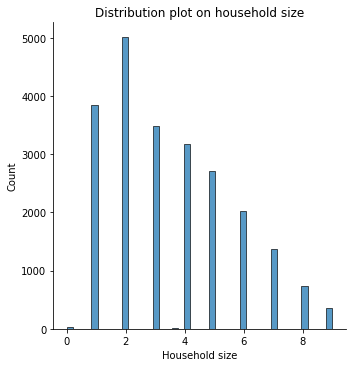

In [285]:
# Plotting a distplot

sns.displot(financial_out['household_size'], kde = False)
plt.title('Distribution plot on household size')
plt.xlabel('Household size')
plt.show()

# From this plot, it is clear that majority of the respondents
# have a household size of 2. It is also clear that the  household size 
# data is skewed to the right.

> 'respondent_age' column - contains numerical data

In [286]:
# General description of the respondent age column

financial_out['respondent_age'].describe()

# The minimum age of the respondent is 16 and maximum respondent age is 83
# The average age is 38(rounded off downwards) which is given by the mean value.
# 25% of the respondents are aged 26 and below, 50% of respondents are aged 35 
# and below and 75% of respondents are aged 48 and below.

count    22764.000000
mean        38.343554
std         15.798691
min         16.000000
25%         26.000000
50%         35.000000
75%         48.000000
max         83.000000
Name: respondent_age, dtype: float64

In [287]:
# Obtaining the coefficient of variance

c_v = financial_out['respondent_age'].std()/financial_out['respondent_age'].mean()
c_v

# The coefficient of variance is less than 1 which indicates low
# variability in the ages of the respondents

0.4120299024041787

In [288]:
# Obtaining skewness

financial_out['respondent_age'].skew()

# The ages are moderately positively skewed.

0.7410828667357151

In [289]:
# Obtaining kurtosis
financial_out['respondent_age'].kurt()

# The ages data is slightly platykurtic. This
# suggests absence of outliers

-0.23379462547051455

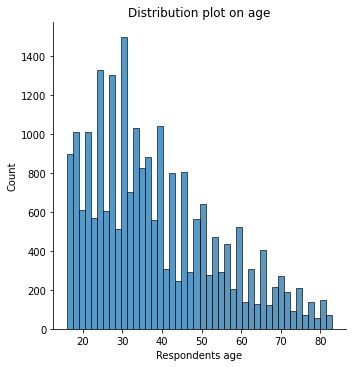

In [290]:
# Plotting a distplot

sns.displot(financial_out['respondent_age'], kde = False)
plt.title('Distribution plot on age')
plt.xlabel('Respondents age')
plt.show()

# The displot offers a graphical proof that the
# data is positively skewed.

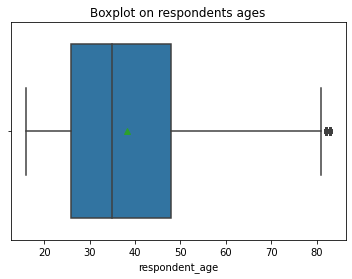

In [291]:
# Plotting a boxplot for age

sns.boxplot(x = financial_out['respondent_age'], showmeans = True)
plt.title('Boxplot on respondents ages')
plt.show()

# The ages column contains some outliers as shown in the boxplot below

> 'gender_of_respondent' column - contains categorical data

In [292]:
# Frequency table on the gender of respondents

financial_out['gender_of_respondent'].value_counts()

# 13423 of the respondents were female and 9341 were male.

Female    13423
Male       9341
Name: gender_of_respondent, dtype: int64

> 'the_relathip_with_head' column - contains categorical data

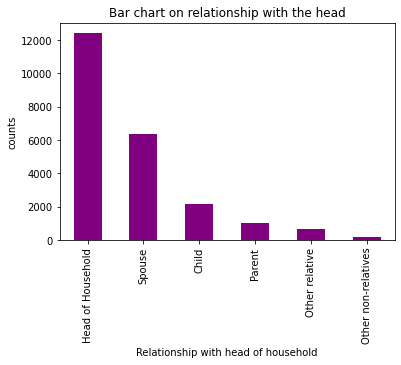

In [293]:
# Bar chart of the relationship with the head of the household

financial_out['the_relathip_with_head'].value_counts().plot.bar(color = 'purple')
plt.title('Bar chart on relationship with the head')
plt.ylabel('counts')
plt.xlabel('Relationship with head of household')
plt.show()

# Majority of the respondents were the heads of the household(approx. 12000)
# followed by the spouses(approx. 6000)

> 'marital_status' column - contains numerical data

In [294]:
# Frequency table on the marital status

financial_out.marital_status.value_counts()

# 10447 respondents are married
# 7764 respondents are single and have never been married
# 2511 respondents are widowed
# 2034 respondents don't know

Married/Living together    10447
Single/Never Married        7764
Widowed                     2511
Divorced/Seperated          2034
Dont know                      8
Name: marital_status, dtype: int64

> 'level_of eduacation' column - contains categorical data

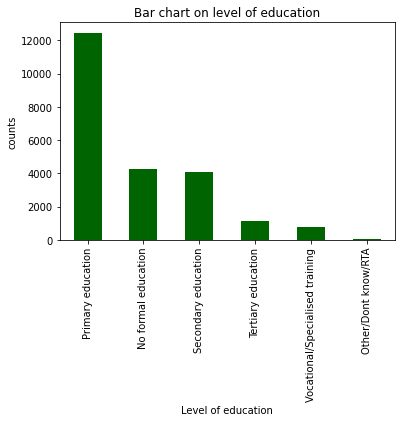

In [295]:
# Bar chart on level of education

financial_out['level_of_educuation'].value_counts().plot.bar(color = 'darkgreen')
plt.title('Bar chart on level of education')
plt.ylabel('counts')
plt.xlabel('Level of education')
plt.show()

# Majority of the respondents have completed there Primary education
# with approx. 4000 with no formal education and approx. 4000 having attained secondary
# education. Those with tertiary education are slightly less than 2000 and those with specialized
# training are approx. 1000

> 'type_of_job' column - contains categorical data

In [296]:
# Frequency table on type of job of the respondents

financial_out.type_of_job.value_counts()

# Most respondents are self employed followed by those who are informally employed
# 118 of the respondents refused to answer while 209 are government dependent.

Self employed                   6222
Informally employed             5502
Farming and Fishing             5302
Remittance Dependent            2377
Formally employed Private       1036
Other Income                    1028
No Income                        588
Formally employed Government     382
Government Dependent             209
Dont Know/Refuse to answer       118
Name: type_of_job, dtype: int64

### Recommendations for effectively performing univariate analysis while working on the current problem.

> The univariate analysis should be done independently and exhaustively on each variable. The visualizations and techniques used should coincide with the type of data in that specific variable.
Measures of central tendancy and dispersion must be used for numerical variables such as 'age of respondents' and 'household size' while frequency tables, histograms and bar charts should be used when dealing with categorical columns such as 'level of education'.

### b) Bivariate analysis

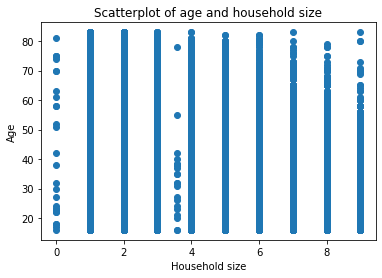

In [297]:
# Scatterplot of age of respondent vs household size

plt.scatter(financial_out['household_size'], financial_out['respondent_age'])
plt.title('Scatterplot of age and household size')
plt.ylabel('Age')
plt.xlabel('Household size')
plt.show()

# Age and household size do not seem to have any correlation just by looking at the scatterplot.

In [298]:
# Correlation coefficient of age and household size

corr = financial_out['household_size'].corr(financial_out['respondent_age'])
print(corr)

# Age and household size are weakly negatively correlated.

-0.10611653818401764


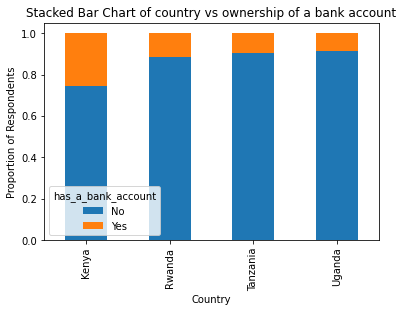

In [299]:
# Stacked bar chart of country vs ownership of a bank account 

table=pd.crosstab(financial_out['country'],financial_out['has_a_bank_account'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of country vs ownership of a bank account')
plt.xlabel('Country')
plt.ylabel('Proportion of Respondents')
plt.show()

# Kenya has the highest number of respondents with a bank account
# followed closely by Uganda, then Tanzania and lastly Rwanda

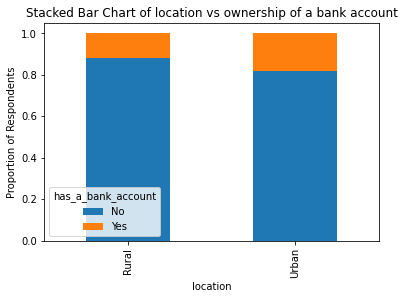

In [300]:
# Stacked bar chart of type of location vs ownership of a bank account 

table=pd.crosstab(financial_out['type_of_location'],financial_out['has_a_bank_account'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of location vs ownership of a bank account')
plt.xlabel('location')
plt.ylabel('Proportion of Respondents')
plt.show()

# The proportion of respondents in rural areas that do not have bank accounts (approx. 90%)
# is higher than the proportion of respondents in urban areas that do not have bank accounts
# (approx. 80%)

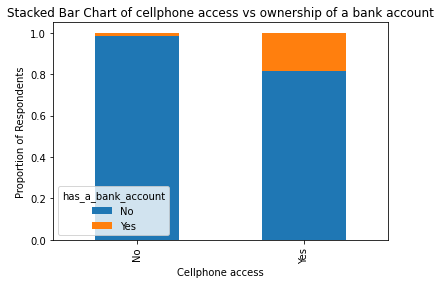

In [301]:
# Stacked bar chart of cellphone access vs ownership of a bank account 

table=pd.crosstab(financial_out['cell_phone_access'],financial_out['has_a_bank_account'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of cellphone access vs ownership of a bank account')
plt.xlabel('Cellphone access')
plt.ylabel('Proportion of Respondents')
plt.show()

# Almost 100% of respondents that do not have a cellphone
# do not have a bank account. Around 80% of those who have a 
# cellphone do not have access to bank accounts. 
# With the increased number of financial institutions offering mobile banking
# it has made it easier for those with phones to access financial services.

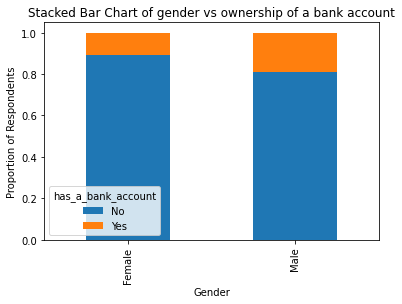

In [302]:
# Stacked bar chart of gender vs ownership of a bank account 

table=pd.crosstab(financial_out['gender_of_respondent'],financial_out['has_a_bank_account'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of gender vs ownership of a bank account')
plt.xlabel('Gender')
plt.ylabel('Proportion of Respondents')
plt.show()

# 90% of the female respondents do not have a bank account while around 80%
# of male respondents do not have a bank account. 

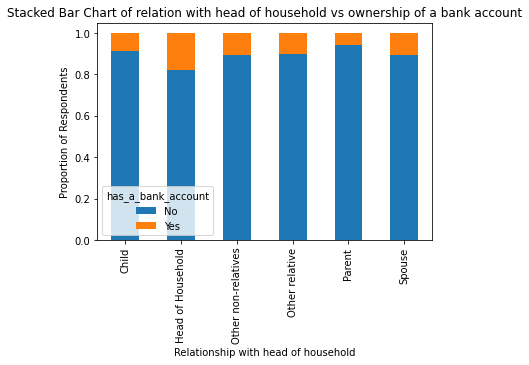

In [303]:
# Stacked bar chart of type of Relationship with the head of the household vs ownership of a bank account 

table=pd.crosstab(financial_out['the_relathip_with_head'],financial_out['has_a_bank_account'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of relation with head of household vs ownership of a bank account')
plt.xlabel('Relationship with head of household')
plt.ylabel('Proportion of Respondents')
plt.show()

# The proportion of those owning a bank account is highest among the heads of the 
# household as compared to other members. The proportion of those
# owning a bank account is lowest among those who are a parent to the head of the household. 

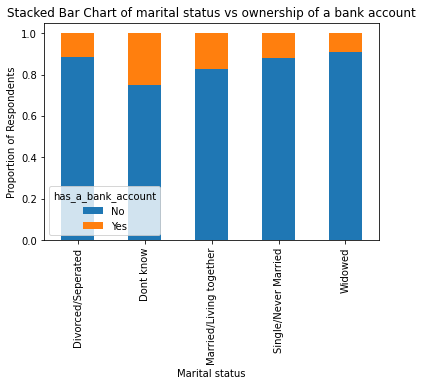

In [304]:
# Stacked bar chart of marital status vs ownership of a bank account 

table=pd.crosstab(financial_out['marital_status'],financial_out['has_a_bank_account'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of marital status vs ownership of a bank account')
plt.xlabel('Marital status')
plt.ylabel('Proportion of Respondents')
plt.show()

# Among those who do not know their marital status, approximately 25% of them have a 
# bank account. Among those who are married approximately 19% of them have a bank account.
# Those who are widowed have the lowest proportion of respondents with a bank account.

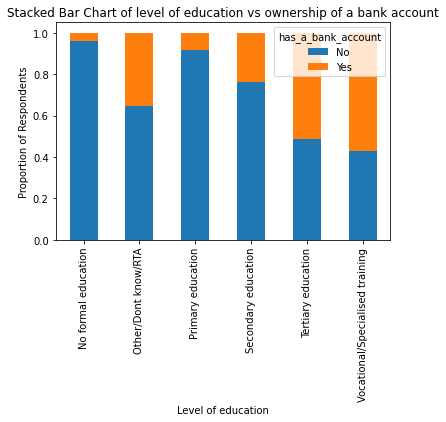

In [305]:
# Stacked bar chart of level of education vs ownership of a bank account 

table=pd.crosstab(financial_out['level_of_educuation'],financial_out['has_a_bank_account'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of level of education vs ownership of a bank account')
plt.xlabel('Level of education')
plt.ylabel('Proportion of Respondents')
plt.show()

# Those with no formal education have the highest proportion of respondents
# without a bank account. Those who have attained tertiary education and specialized
# training have the second highest and highest proportion of respondents with a bank account respectively

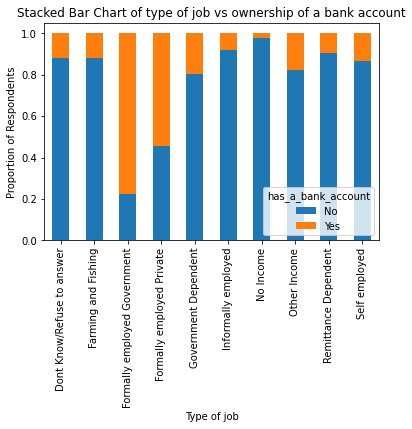

In [306]:
# Stacked bar chart of type of job vs ownership of a bank account 

table=pd.crosstab(financial_out['type_of_job'],financial_out['has_a_bank_account'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of type of job vs ownership of a bank account')
plt.xlabel('Type of job')
plt.ylabel('Proportion of Respondents')
plt.show()

# Those formally employed in the government have the highest proportion of respondents
# with a bank account. As expected, those who do not have income, have the lowest proportion
# of respondents with a bank account.

In [307]:
# Describing the numerical data based on whether the respondent has a  bank account or not

financial_out.groupby('has_a_bank_account').describe()

# What to note here is:
# - The average household size for those who do not have a bank account(3.59) is slightly higher than for
# those that have a bank account(3.46).
# - The average age of those that have a bank account(39.33) is slightly higher than the average age for those that
# do not have a bank account(38.18).
# - The standard deviation for age with those that do not have a bank account is higher than the standard deviation for age 
# for those that have a bank account(16.08 and 13.93 respectively).

year                         ... respondent_age            
                      count         mean       std  ...            50%   75%   max
has_a_bank_account                                  ...                           
No                  19525.0  2016.927836  0.834101  ...           35.0  49.0  83.0
Yes                  3239.0  2017.208398  0.878388  ...           36.0  47.0  83.0

[2 rows x 24 columns]

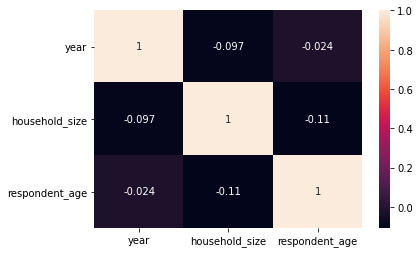

In [308]:
# Correlation matrix heatmap for the quantitative variables

sns.heatmap(financial_out.corr(),annot=True)
plt.show()

In [310]:
# Hypothesis testing for the difference between the mean of household size of Kenya and Rwanda


# Null hypothesis: mean of household size of the two groups is equal
# Alternative hypothesis: mean of household size of the two groups is not equal

rwanda = financial_out.loc[financial_out['country'] == 'Rwanda']
kenya = financial_out.loc[financial_out['country'] == 'Kenya']

from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval = stests.ztest(rwanda['household_size'], x2=kenya['household_size'], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


# The p value is < 0.05. Hence the null hypothesis is rejected and conclude that there
# is a difference in means of household sizes in Rwanda and Kenya.

4.453523703147315e-61
reject null hypothesis


### Recommendations for effectively performing bivariate analysis while working on the current problem.

> Since the main objective is to determine how and which variables affect whether or not an individual owns a bank account, the bivariate analysis should be done on each variable versus the 'has a bank account' column. 
This approach will provide the greatest insights that are relevant to answering our analysis question while also saving on time.

### c) Multivariate analysis

> Multivariate analysis using Principal Component analysis as a dimensinality reduction tool

In [311]:
# Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder

cols = ['country','type_of_location', 'has_a_bank_account', 'cell_phone_access', 'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'  ]
#
# Encode labels of multiple columns at once
#
financial_out[cols]= financial_out[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
financial_out.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,0,2018,1,0,1,3.0,24.0,0,5,2,3,9
1,0,2018,0,0,0,5.0,70.0,0,1,4,0,4
2,0,2018,1,1,1,5.0,26.0,1,3,3,5,9
3,0,2018,0,0,1,5.0,34.0,0,1,2,2,3
4,0,2018,0,1,0,8.0,26.0,1,0,3,2,5


In [312]:
# Step 1: Preprocessing

X = financial_out.drop('year', 1)
y = financial_out['cell_phone_access']

In [313]:
# Step 2: Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [314]:
# Step 3: Normalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [315]:
# Step 4: Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [316]:
# Step 5: Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_

# It can be seen that first principal component is responsible for 17.95% variance. 
# Similarly, the second principal component causes 15.77% variance in the dataset. 
# 58.15 percent(17.95% + 15.77% + 14.21% + 10.35%) of the classification information contained 
# in the feature set is captured by the first four principal components.
explained_variance

array([0.17947754, 0.15769835, 0.14211466, 0.10357704, 0.07821357,
       0.07427197, 0.06710606, 0.06308533, 0.04983681, 0.0452944 ,
       0.03932427])

In [317]:
# Step 6: Using 1 principal component to train our algorithm.

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [318]:
# Step 7: Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [319]:
# Step 8: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# The output with only one component resulted in 82.0% accuracy

[[ 337  782]
 [  37 3397]]
Accuracy 0.8201186031188228


In [320]:
# Step 9: Results with 2 principal components

# Preprocessing

X = financial_out.drop('year', 1)
y = financial_out['cell_phone_access']

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_

explained_variance

# Using 2 principal components to train our algorithm.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Performance Evaluation 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# The output with 2 components resulted in 82.2% accuracy as compared
# to the 82.0% accuracy under 1 component

[[ 345  774]
 [  36 3398]]
Accuracy 0.8220953217658686


In [321]:
# Step 10: Results with 4 principal components

# Preprocessing

X = financial_out.drop('year', 1)
y = financial_out['cell_phone_access']

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_

explained_variance

# Using 4 principal components to train our algorithm.

from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Performance Evaluation 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# The output with 4 components resulted in 82.5% accuracy as compared
# to the 82.2% accuracy under 2 components

[[ 354  765]
 [  34 3400]]
Accuracy 0.8245113112233692


In [322]:
# Step 11: Results with 5 principal components

# Preprocessing

X = financial_out.drop('year', 1)
y = financial_out['cell_phone_access']

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_

explained_variance

# Using 5 principal components to train our algorithm.

from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Performance Evaluation 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# The output with 5 components resulted in 82.40% accuracy as compared
# to the 82.5% accuracy under 4 components

[[ 350  769]
 [  32 3402]]
Accuracy 0.8240720404129146


### Recommendations for effectively performing multivariate analysis while working on the current problem.

> In order to build an accurate model, the dimensions of the dataset should be reduced. Factor Analysis, Linear Discriminant Analysis and Principal component analysis can be used to do this. These three techniques will help us determine which variables with be most important in order to build our model later.

## 8. Implementing the solution

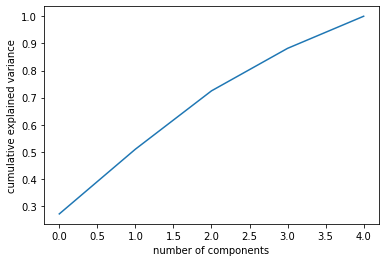

In [323]:
# Scree plot of cumulative explained variance vs number of components. 

#Explained variance
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# As the number of components increases the cumulative explained variance increases and
# so does accuracy The optimal number of principal components is four according to the scree plot.
# The features in those principal components will explain the dependent variable the best.

## 9. Challenging the solution

> The question that I formulated was simple but to the point. One major improvement I would have made is to build a logistic regression model to determine the impact of the features on bank account ownership. 
This would come a long way in giving clear insights on the financial inclusion issue at hand in East Africa.

## 10. Follow-up questions

### a) Did I have the right data?

> The data I used was relevant to my analysis. However, there may have been more variables that could have contributed to the robustness of the analysis. Moreover, data should have been provided for the same year across the four countries. Mixing the years would not enable one to implement the solution correctly.

### b) Did I need other data to answer the question?

> Yes. I needed more data on Kenya, Tanzania, Uganda and Rwanda for all the years 2016 - 2018. This would have helped me implement the solution more accurately. The solution given may have been biased because the data was recorded in different years for the 4 countries 

### c) Did I have the right question?

> I had the right question but was not able to build a model that could determine which variables are of the most importance and to what degree. This is beacause I did not have the techiniques (machine learning) to answer the question exhaustively. 